In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json
import multiprocessing

In [2]:
#chunksize = 10 ** 2
#for chunk in pd.read_csv("part-00000", chunksize=chunksize):
#    process(chunk)

df = pd.read_csv("part-00000", header=None)
df.columns = header = ["label", "total_pixels", "x_pixels", "y_pixels",
              "integrated_intensity", "brightest_pixel", "brightest_pixel_x", "brightest_pixel_y",
              "brightest_pixel_RA", "brightest_pixel_DEC", "center_of_mass_x", "center_of_mass_y",
              "center_of_mass_RA", "center_of_mass_DEC", "center_of_gaus_fit_x", "center_of_gaus_fit_y",
              "center_of_gaus_fit_RA", "center_of_gaus_fit_DEC", "fit_x_axis", "fit_y_axis", "fit_theta",
              "deconv_x", "deconv_y", "integrated_intensity_fit", "ratio_residual"
             ]

In [3]:
df.head()

,label,total_pixels,x_pixels,y_pixels,integrated_intensity,brightest_pixel,brightest_pixel_x,brightest_pixel_y,brightest_pixel_RA,brightest_pixel_DEC,...,center_of_gaus_fit_y,center_of_gaus_fit_RA,center_of_gaus_fit_DEC,fit_x_axis,fit_y_axis,fit_theta,deconv_x,deconv_y,integrated_intensity_fit,ratio_residual
0,P244+48_0,28,4,6,0.658204,0.000776,139,5389,247.218439,47.945955,...,5389.424096,247.218388,47.946133,3.229095,1.546223,-0.116897,6.466828,0.000000,0.666204,0.116074
1,P244+48_1,16,4,4,0.362765,0.000715,164,5608,247.207640,48.037513,...,5608.597502,247.208414,48.037744,1.368732,1.592572,0.174488,0.000000,0.000000,0.373678,0.171477
2,P244+48_2,252,17,19,89.688294,0.070113,178,5618,247.199134,48.041879,...,5617.918421,247.199514,48.041837,1.987786,2.394094,-0.971472,2.431176,3.972809,83.919891,0.093799
3,P244+48_3,16,2,6,0.325570,0.000646,177,5680,247.201103,48.067684,...,5677.000000,247.200414,48.066449,1.929362,2.741847,-0.459429,2.154432,5.068247,0.336121,0.148926
4,P244+48_4,35,6,10,0.871635,0.000914,186,5485,247.191275,47.986609,...,5484.814843,247.190786,47.986543,3.308711,1.257191,0.423073,6.686271,0.000000,0.866828,0.260645


In [4]:
df.describe()

,total_pixels,x_pixels,y_pixels,integrated_intensity,brightest_pixel,brightest_pixel_x,brightest_pixel_y,brightest_pixel_RA,brightest_pixel_DEC,center_of_mass_x,...,center_of_gaus_fit_y,center_of_gaus_fit_RA,center_of_gaus_fit_DEC,fit_x_axis,fit_y_axis,fit_theta,deconv_x,deconv_y,integrated_intensity_fit,ratio_residual
count,2.291395e+06,2.291395e+06,2.291395e+06,2.287893e+06,2.287893e+06,2.291395e+06,2.291395e+06,2.291395e+06,2.291395e+06,2.287893e+06,...,2.291395e+06,2.291395e+06,2.291395e+06,2.291395e+06,2.291395e+06,2.291391e+06,2.291395e+06,2.291395e+06,2.287887e+06,2.287887e+06
mean,6.709887e+01,7.456417e+00,8.585996e+00,5.787243e+00,3.542601e-03,4.635848e+03,4.615950e+03,1.836146e+02,4.961020e+01,4.636599e+03,...,4.615286e+03,1.836144e+02,4.960992e+01,2.626846e+00,2.502171e+00,5.071408e-03,3.911889e+00,3.455691e+00,5.684166e+00,1.421414e-01
std,3.414389e+02,7.538168e+00,8.346169e+00,1.076074e+02,6.333568e-02,2.370613e+03,2.341016e+03,5.006163e+01,6.970451e+00,2.368919e+03,...,2.341008e+03,5.006162e+01,6.970452e+00,3.311178e+00,3.265780e+00,1.448376e+00,8.303998e+00,8.238538e+00,1.238574e+02,1.255870e-01
min,1.300000e+01,0.000000e+00,1.000000e+00,1.072606e-01,1.792818e-04,2.000000e+00,2.000000e+00,8.101492e-04,2.373915e+01,3.347199e+00,...,2.000000e+00,5.978083e-04,2.373875e+01,0.000000e+00,0.000000e+00,-2.880433e+02,0.000000e+00,0.000000e+00,-2.338746e+02,2.746336e-03
25%,2.200000e+01,4.000000e+00,5.000000e+00,2.838947e-01,4.333725e-04,2.750000e+03,2.744000e+03,1.609147e+02,4.475846e+01,2.752312e+03,...,2.743069e+03,1.609145e+02,4.475825e+01,1.689932e+00,1.513427e+00,-3.780277e-01,0.000000e+00,0.000000e+00,2.871600e-01,6.332294e-02
50%,3.200000e+01,6.000000e+00,6.000000e+00,4.806141e-01,5.940558e-04,4.600000e+03,4.591000e+03,1.885275e+02,4.981468e+01,4.600855e+03,...,4.590521e+03,1.885274e+02,4.981435e+01,1.944432e+00,1.826871e+00,9.985183e-04,2.228293e+00,1.583288e+00,4.864987e-01,9.836633e-02
75%,5.600000e+01,8.000000e+00,9.000000e+00,1.072997e+00,1.006330e-03,6.477000e+03,6.433000e+03,2.168046e+02,5.529788e+01,6.476035e+03,...,6.432808e+03,2.168047e+02,5.529768e+01,2.456003e+00,2.265934e+00,3.822554e-01,4.177110e+00,3.531499e+00,1.080982e+00,1.744687e-01
max,2.838500e+05,1.707000e+03,9.990000e+02,6.458131e+04,4.572484e+01,1.080700e+04,1.078300e+04,3.599989e+02,6.200953e+01,1.080586e+04,...,1.078279e+04,3.599991e+02,6.200928e+01,1.707000e+03,7.310000e+02,2.646820e+02,4.019676e+03,1.721369e+03,6.168559e+04,1.637727e+00


In [5]:
data_for_hist = ['total_pixels', 'integrated_intensity', 'brightest_pixel', 'fit_x_axis', 'fit_y_axis', 'deconv_x', 'deconv_y', 'integrated_intensity_fit', 'ratio_residual']
data = df[data_for_hist]
#sns.pairplot(data)

Text(0, 0.5, 'Counts')

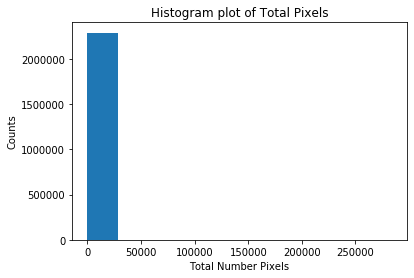

In [6]:
plt.hist(df.total_pixels)
plt.title('Histogram plot of Total Pixels')

plt.xlabel('Total Number Pixels')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

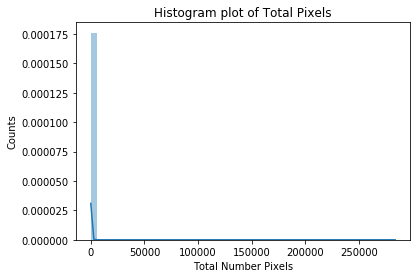

In [7]:
sns.distplot(df.total_pixels)
plt.title('Histogram plot of Total Pixels')

plt.xlabel('Total Number Pixels')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

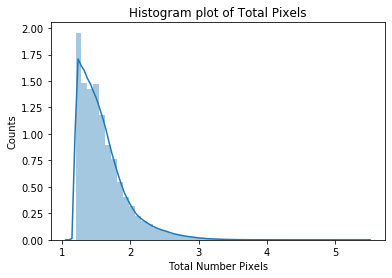

In [8]:
sns.distplot(np.log10(df.total_pixels))
plt.title('Histogram plot of Total Pixels LOGSCALE')

plt.xlabel('Total Number Pixels')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

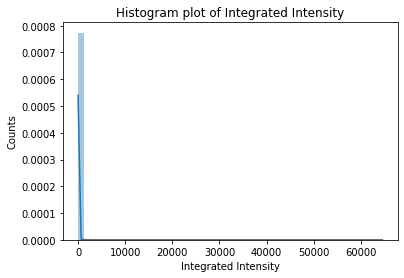

In [9]:
sns.distplot(df.integrated_intensity)
plt.title('Histogram plot of Integrated Intensity')

plt.xlabel('Integrated Intensity')
plt.ylabel('Counts')


Text(0, 0.5, 'Counts')

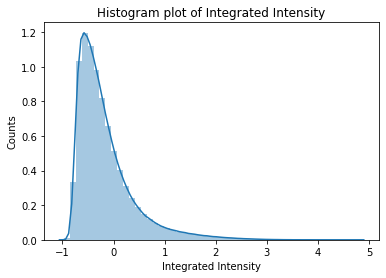

In [10]:
sns.distplot(np.log10(df.integrated_intensity))
plt.title('Histogram plot of Integrated Intensity LOGSCALE')

plt.xlabel('Integrated Intensity')
plt.ylabel('Counts')


Text(0, 0.5, 'Counts')

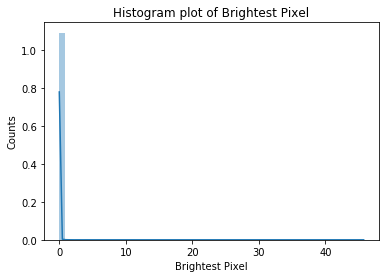

In [11]:
sns.distplot(df.brightest_pixel)
plt.title('Histogram plot of Brightest Pixel')

plt.xlabel('Brightest Pixel')
plt.ylabel('Counts')


Text(0, 0.5, 'Counts')

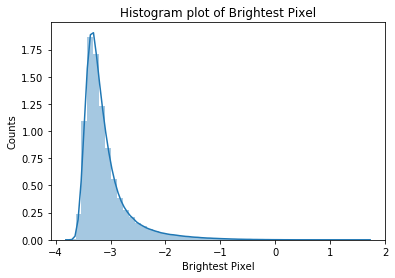

In [12]:
sns.distplot(np.log10(df.brightest_pixel))
plt.title('Histogram plot of Brightest Pixel LOGSCALE')

plt.xlabel('Brightest Pixel')
plt.ylabel('Counts')


Text(0, 0.5, 'Counts')

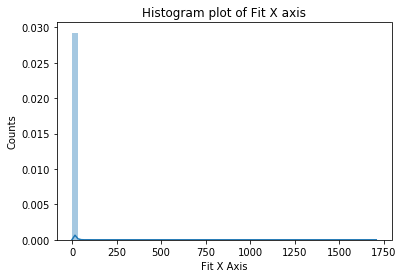

In [13]:
sns.distplot(df.fit_x_axis)
plt.title('Histogram plot of Fit X axis')

plt.xlabel('Fit X Axis')
plt.ylabel('Counts')

In [14]:
df.loc[df.fit_x_axis==0.0, 'fit_x_axis'] =1.0e-8  ## Some values are 0 implying log (0) = inf. So it replaced by a finite value 1000 times less than the minimum value

Text(0, 0.5, 'Counts')

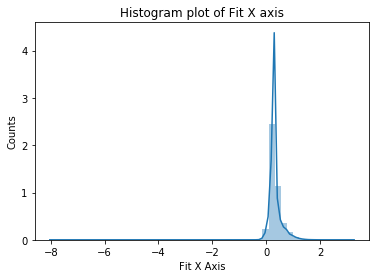

In [15]:
sns.distplot(np.log10(df.fit_x_axis))
plt.title('Histogram plot of Fit X axis LOGSCALE')

plt.xlabel('Fit X Axis')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

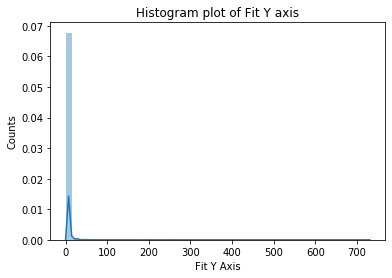

In [16]:
sns.distplot(df.fit_y_axis)
plt.title('Histogram plot of Fit Y axis')

plt.xlabel('Fit Y Axis')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

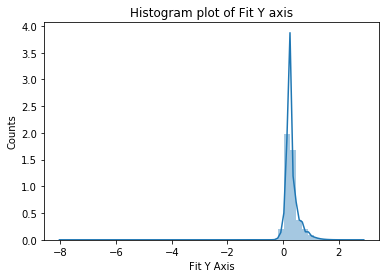

In [17]:
df.loc[df.fit_y_axis==0.0, 'fit_y_axis'] =1.0e-8 
sns.distplot(np.log10(df.fit_y_axis))
plt.title('Histogram plot of Fit Y axis LOGSCALE')

plt.xlabel('Fit Y Axis')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

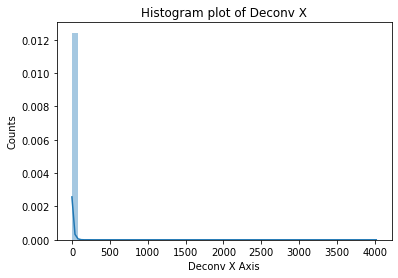

In [18]:
sns.distplot(df.deconv_x)
plt.title('Histogram plot of Deconv X')

plt.xlabel('Deconv X Axis')
plt.ylabel('Counts')

In [19]:
df.loc[df.deconv_x == 0, 'deconv_x'] = 1.0e-8

Text(0, 0.5, 'Counts')

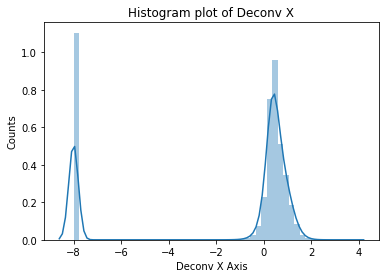

In [20]:
sns.distplot(np.log10(df.deconv_x))
plt.title('Histogram plot of Deconv X LOGSCALE')

plt.xlabel('Deconv X Axis')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

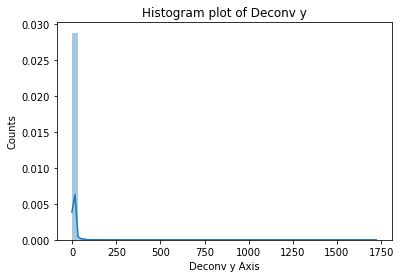

In [21]:
sns.distplot(df.deconv_y)
plt.title('Histogram plot of Deconv y')

plt.xlabel('Deconv y Axis')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

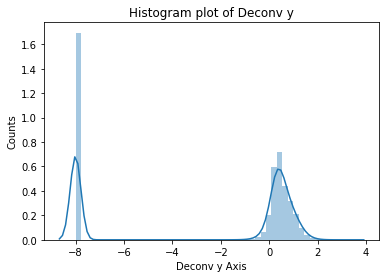

In [22]:
df.loc[df.deconv_y == 0, 'deconv_y'] = min(df.loc[df.deconv_y > 0, 'deconv_y'])/10000
sns.distplot(np.log10(df.deconv_y))
plt.title('Histogram plot of Deconv y LOGSCALE')

plt.xlabel('Deconv y Axis')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

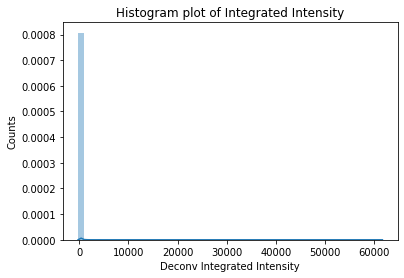

In [23]:
sns.distplot(df.integrated_intensity_fit)
plt.title('Histogram plot of Integrated Intensity')
plt.xlabel('Integrated Intensity Fit ')
plt.ylabel('Counts')

/home/s2681846/.local/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Counts')

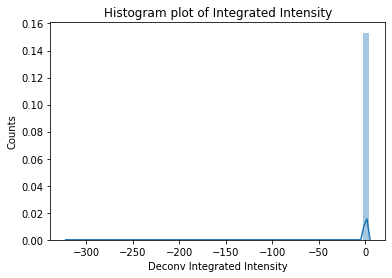

In [28]:
df.loc[df.integrated_intensity_fit == 0, 'integrated_intensity_fit'] = min(df.loc[df.integrated_intensity_fit > 0].integrated_intensity_fit)/1000
sns.distplot(np.log10(df.integrated_intensity_fit))
plt.title('Histogram plot of Integrated Intensity Fit LOGSCALE')
plt.xlabel('Integrated Intensity Fit ')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

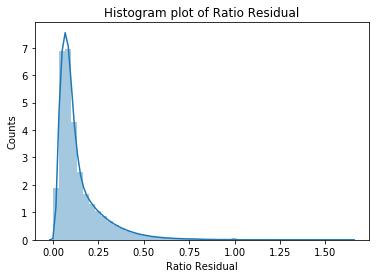

In [29]:
sns.distplot(df.ratio_residual)
plt.title('Histogram plot of Ratio Residual')

plt.xlabel('Ratio Residual')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

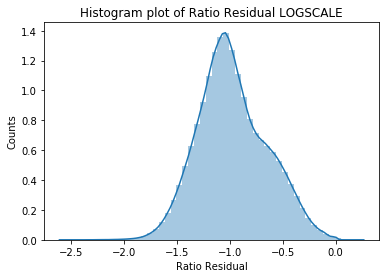

In [31]:
df.loc[df.ratio_residual == 0, 'ratio_residual'] = min(df.loc[df.ratio_residual > 0].ratio_residual)/1000

sns.distplot(np.log10(df.ratio_residual))
plt.title('Histogram plot of Ratio Residual LOGSCALE')

plt.xlabel('Ratio Residual')
plt.ylabel('Counts')